# Librerias

In [113]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from kneed import KneeLocator
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# K_Means

## Scatter de las versiones del dataset

### PCA y scaler común para todos

In [ ]:
scaler = StandardScaler()
pca = PCA(n_components=2)

### Generar X_pca

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


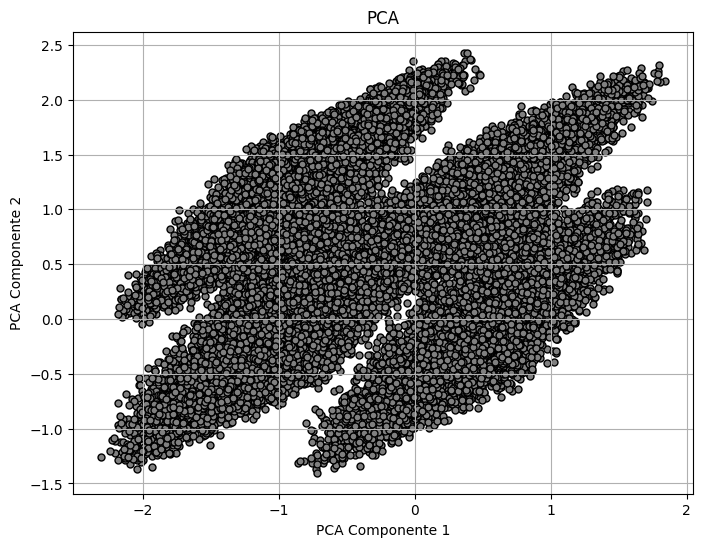

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


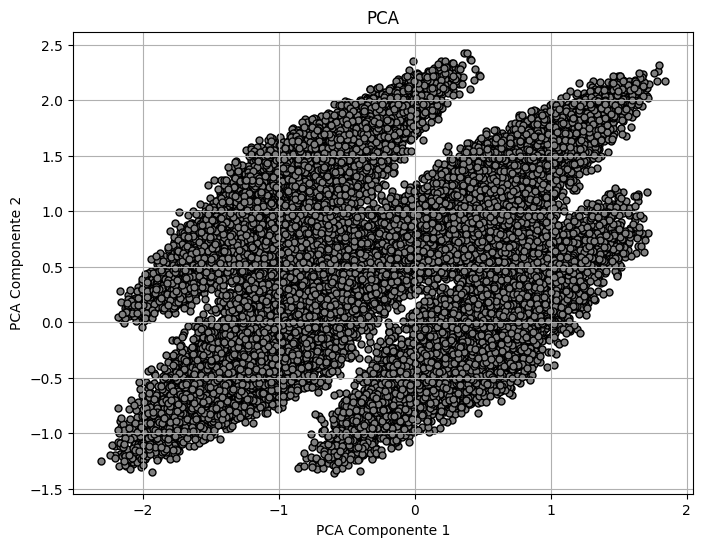

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


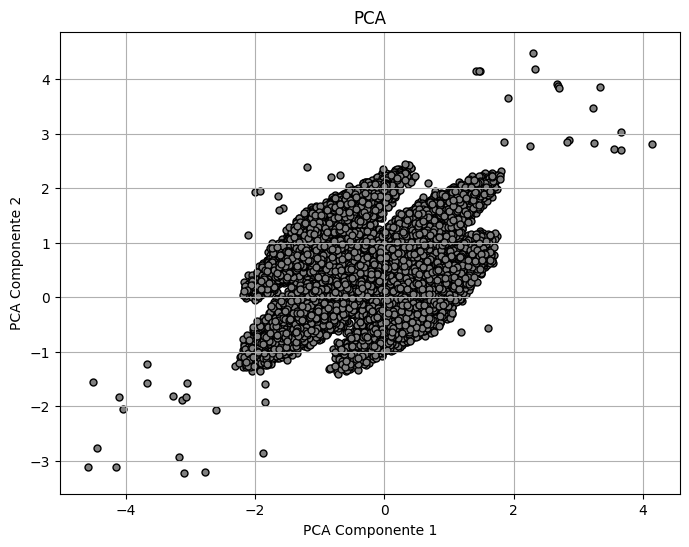

c:\Users\Usuario\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


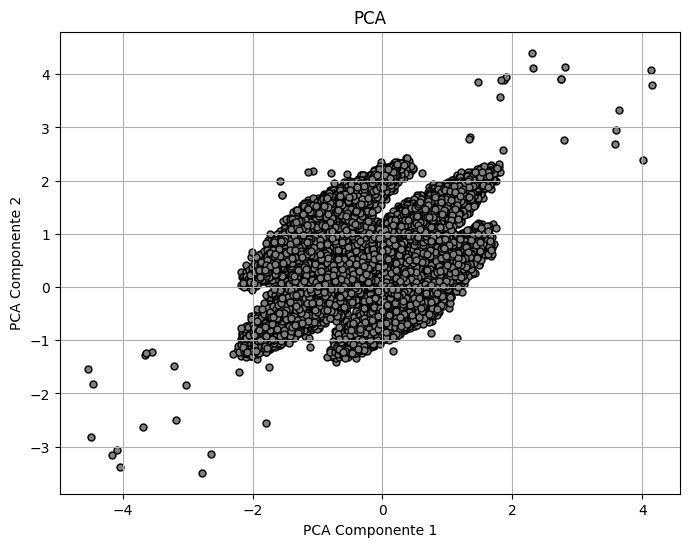

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


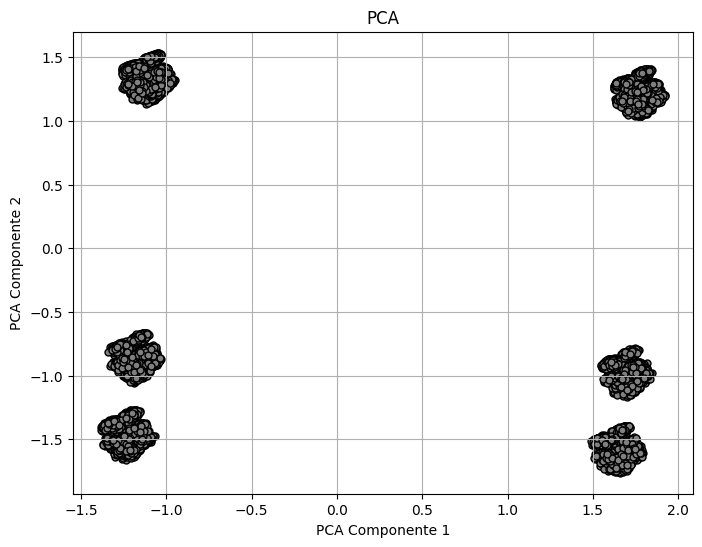

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


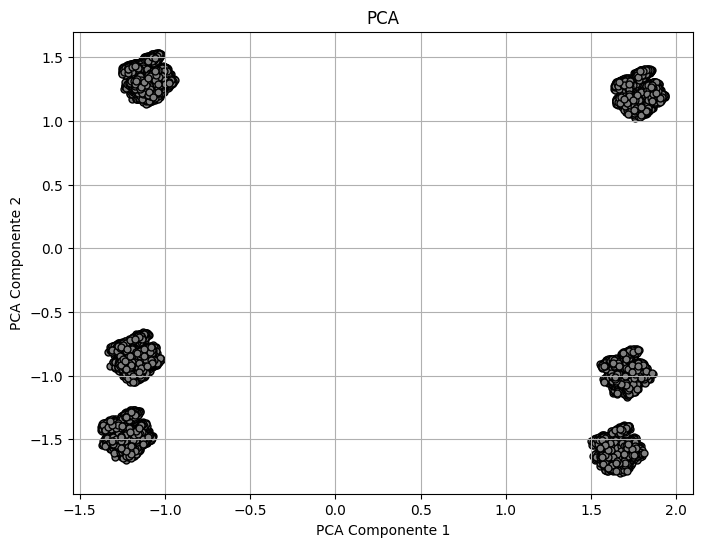

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9048\11311285.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)


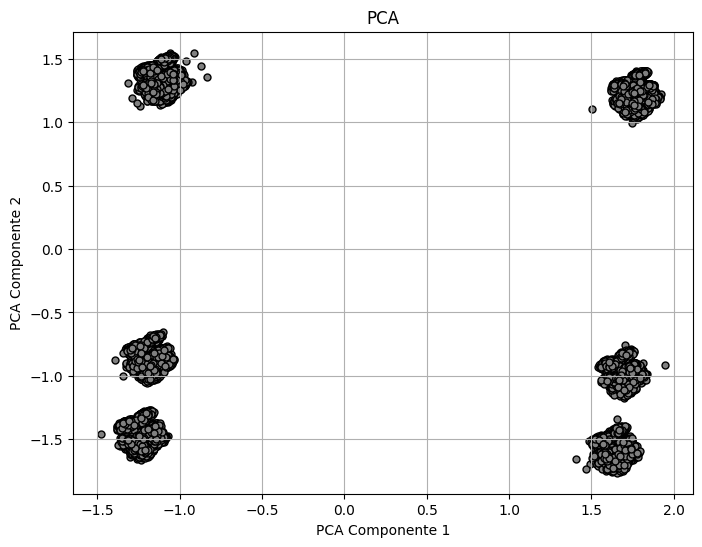

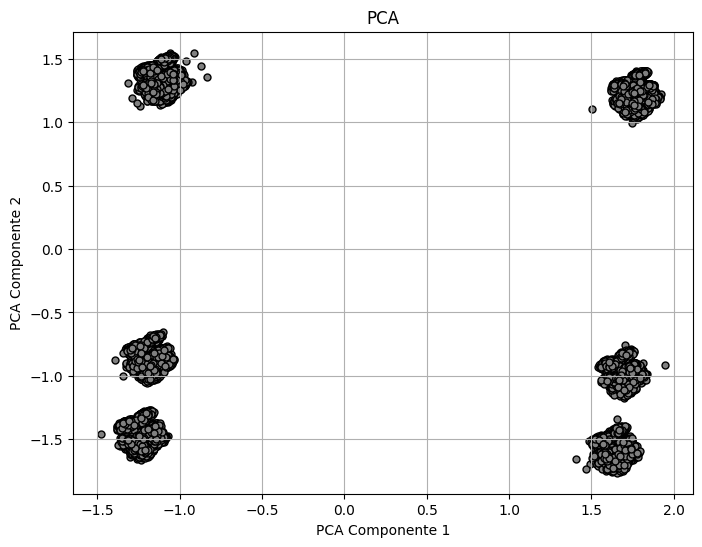

In [100]:
datasets = {}
X_pcas = {}

for i in range(1, 9):
    with open(f'pickle/dataset_v{i}.pkl', 'rb') as f:
        datasets[f'v{i}'] = pickle.load(f)  # Cargar datasets

# Normalizar y aplicar PCA al dataset v8 (dataset al que se le aplico fit)
datasets['v8']['X_train'] = scaler.fit_transform(datasets['v8']['X_train'])
datasets['v8']['X_train'] = pca.fit_transform(datasets['v8']['X_train'])

for i in range(1, 9):
    data = datasets[f'v{i}']

    if i != 8:
        X = scaler.transform(data['X_train'])
    else:
        X = data['X_train']
    

    if i != 8:
        X_pca = pca.transform(X)
    else:
        X = data['X_train']
    X_pcas[f'v{i}'] = X_pca

    plt.figure(figsize=(8, 6))
    plt.scatter(X_pca[:, 0], X_pca[:, 1], c="gray", cmap='viridis', marker='o', edgecolor='k', s=25)
    plt.title("PCA")
    plt.xlabel('PCA Componente 1')
    plt.ylabel('PCA Componente 2')
    plt.grid()
    plt.show()  

## Funcion para realizar los procesos


### Generar casos de prueba

In [101]:
test_cases = [
    [25, 0.9, 1, 5, 47, 59, 20, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0],  # Ejemplo 1
    [15, 25, 0, 16, 110, 150, 40, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0],  # Ejemplo 2
    [30, 10, 3, 7, 55, 73, 28, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0],  # Ejemplo 3
]

    # Convertir a array
test_array = np.array(test_cases)

    # Escalar con el mismo scaler que usaste con X_train
test_scaled = scaler.transform(test_array)

    # Aplicar proyección PCA con el mismo modelo entrenado
test_pca = pca.transform(test_scaled)

### Funcion Principal

In [102]:
best_inertias = {}
best_k_values = {}
best_silhouette_scores = {}

def kmeans_clustering(X_pca, v):
    silhouette_scores = []
    inertias = [] # SSE
    k_values = range(2, 8)
    fig, axs = plt.subplots(2, 3, figsize=(18, 10))
    axs = axs.flatten()

    for idx, k in enumerate(k_values):
        kmeans = KMeans(n_clusters=k, random_state=42)  # Define el número de clusters
        labels = kmeans.fit_predict(X_pca)                            # Aplica el modelo y obtiene las etiquetas
        centers = kmeans.cluster_centers_                     # Obtiene las coordenadas de los centroides
        inertia = kmeans.inertia_                            # Inercia: suma de distancias intra-cluster
        score = silhouette_score(X_pca, labels)                  # Calcula el Silhouette Score

        silhouette_scores.append(score)
        inertias.append(inertia)

        # Gráficas de dispersión con los resultados de K-Means
        axs[idx].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
        axs[idx].scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label='Centroides')
        axs[idx].set_title(f"k={k} | Silhouette={score:.2f} | Inercia={inertia:.0f}")
        axs[idx].set_xlabel("Característica 1")
        axs[idx].set_ylabel("Característica 2")
        axs[idx].legend()

    plt.tight_layout()
    plt.suptitle("Resultados de K-Means para distintos valores de k", fontsize=16, y=1.03)
    plt.show()

    # Gráfica de Silhouette
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, silhouette_scores, marker='o', color='blue')
    plt.title("Silhouette Score vs Número de Clusters (k)")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.show()
    # Gráfica de Inercia
    plt.figure(figsize=(8, 5))
    plt.plot(k_values, inertias, marker='s', color='orange')
    plt.title("Inercia vs Número de Clusters (k)")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("Inercia (Distancia total intra-cluster)")
    plt.grid(True)
    plt.show()

    # Encontrar el número óptimo de clusters usando la técnica del codo
    kl = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
    optimal_k = kl.elbow
    best_k_values[v] = optimal_k  # Guardar el número óptimo de clusters

    print(f"Número óptimo de clústeres según la técnica del codo: {optimal_k}")
    inertia_optimal = inertias[optimal_k - 2]  # Ajustar índice para k_values que empieza en 2
    best_inertias[v] = inertia_optimal # Guardar la inercia óptima
    print(f"Inercia para el número óptimo de clústeres (k={optimal_k}): {inertia_optimal:.0f}")
    silhouette_score_optimal = silhouette_scores[optimal_k - 2]  # Ajustar índice para k_values que empieza en 2
    best_silhouette_scores[v] = silhouette_score_optimal  # Guardar el Silhouette Score óptimo
    print(f"Silhouette Score para el número óptimo de clústeres (k={optimal_k}): {silhouette_score_optimal:.2f}")

    # Entrenar el modelo KMeans con el número óptimo de clusters
    kmeans = KMeans(n_clusters=optimal_k, random_state=42)
    kmeans.fit_predict(X_pca)
    # predecir casos de prueba
    predicted_clusters = kmeans.predict(test_pca)

    # Mostrar resultados
    for i, cluster in enumerate(predicted_clusters, 1):
        print(f"Test case {i} → asignado al clúster: {cluster}")

## v1

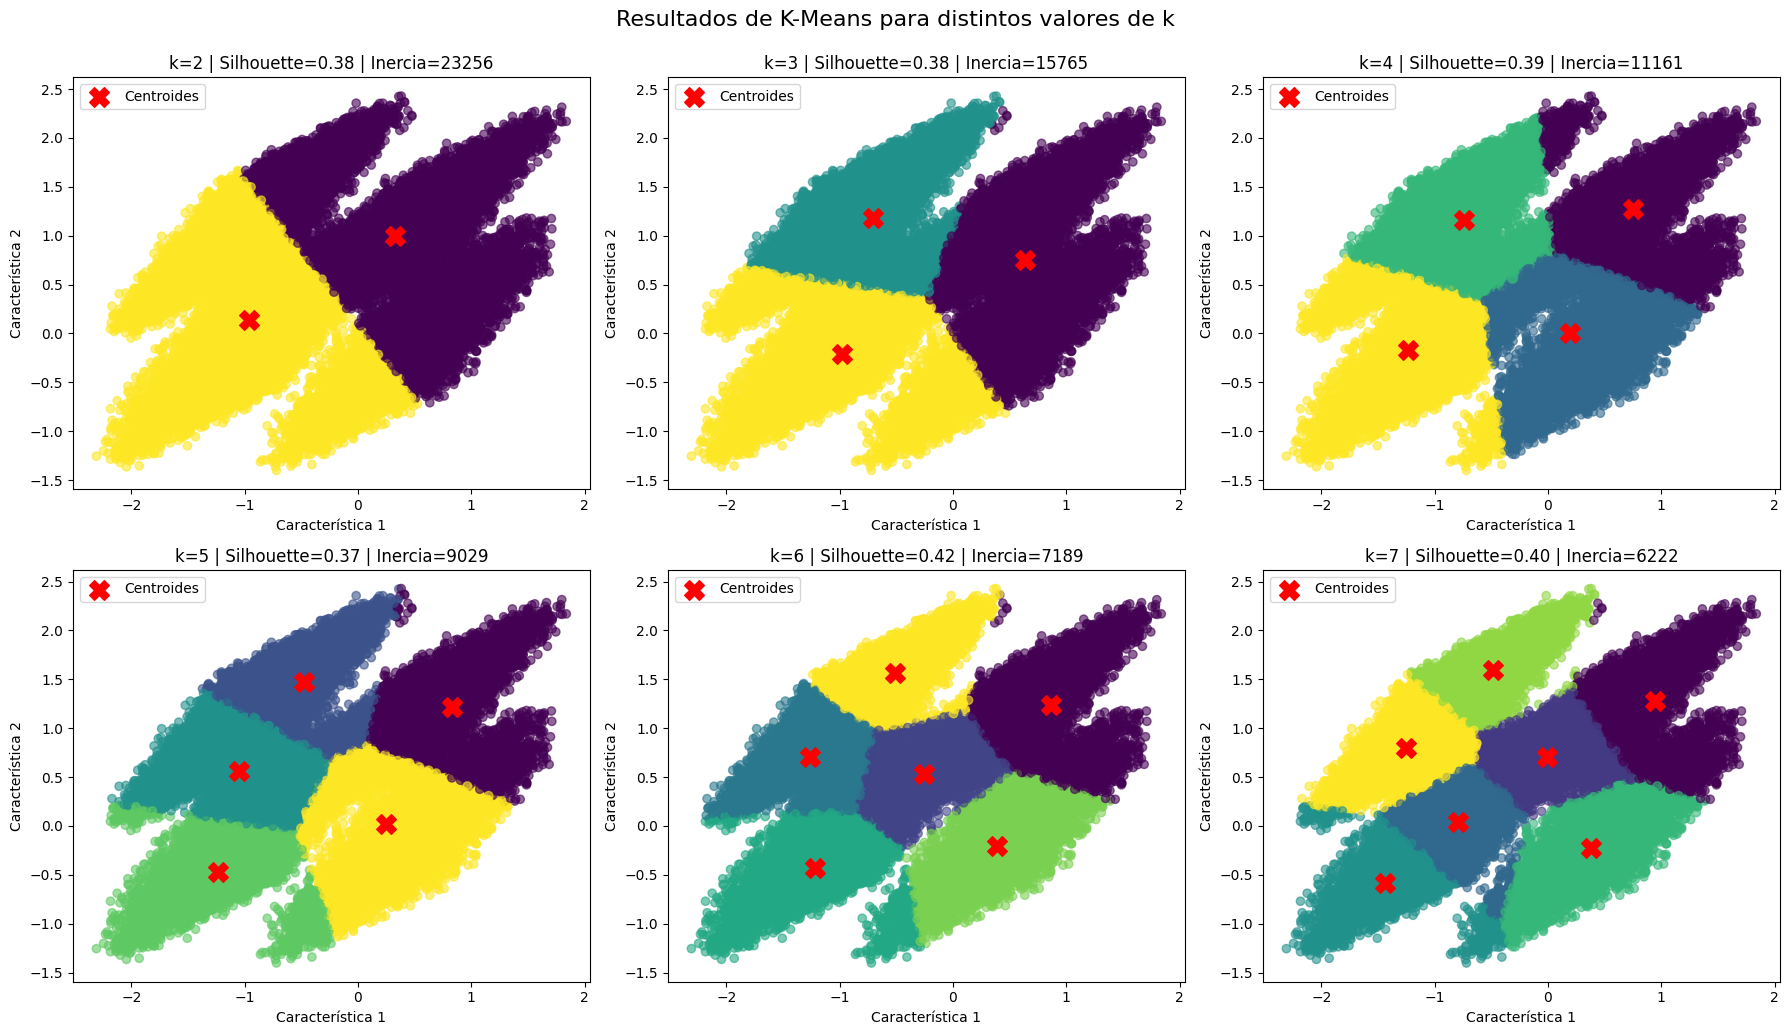

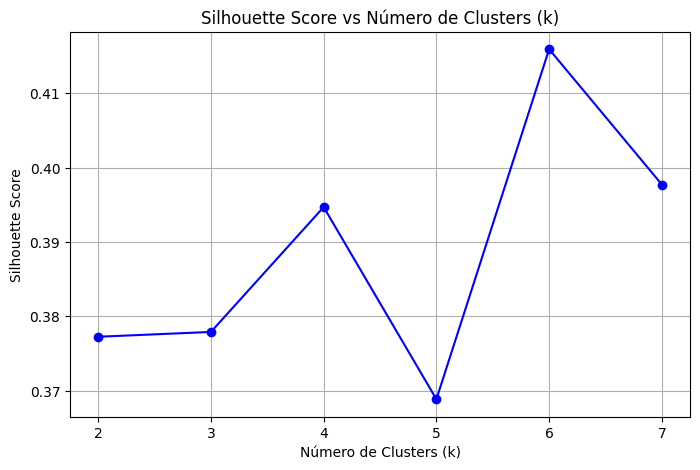

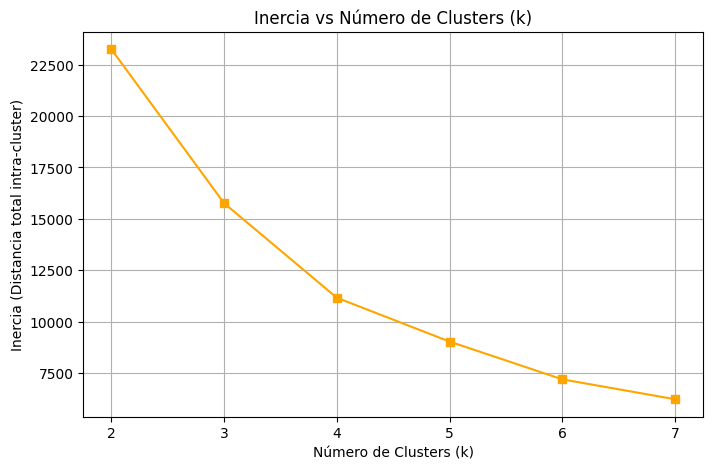

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11161
Silhouette Score para el número óptimo de clústeres (k=4): 0.39
Test case 1 → asignado al clúster: 3
Test case 2 → asignado al clúster: 3
Test case 3 → asignado al clúster: 1


In [103]:
kmeans_clustering(X_pcas['v1'],1)

## v2

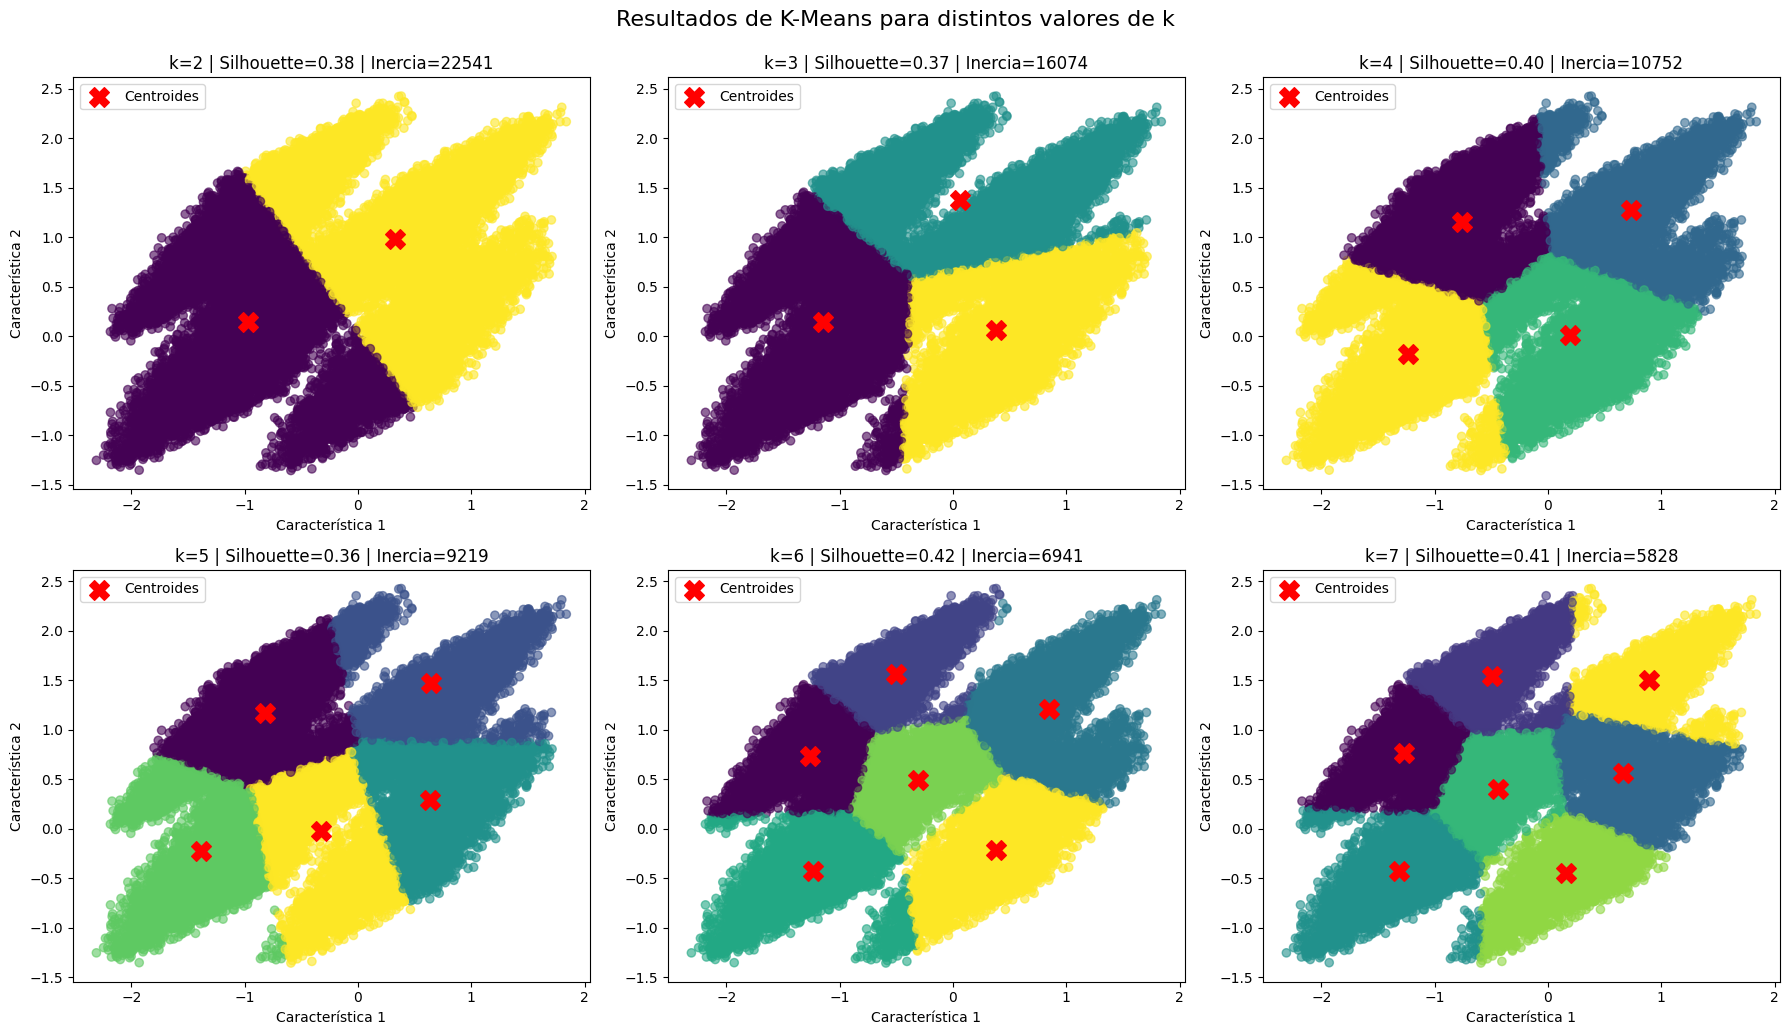

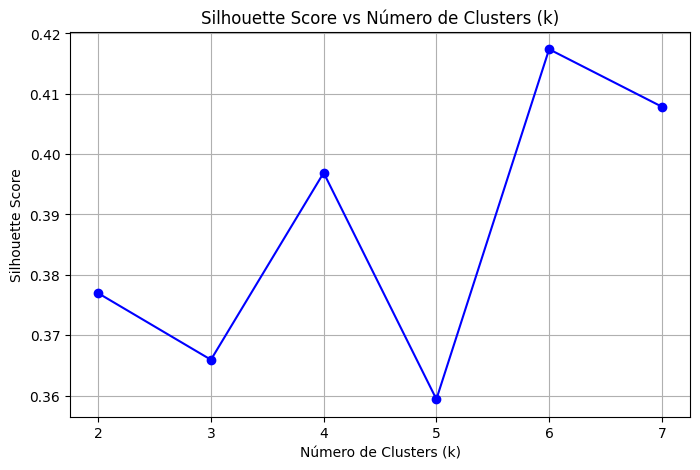

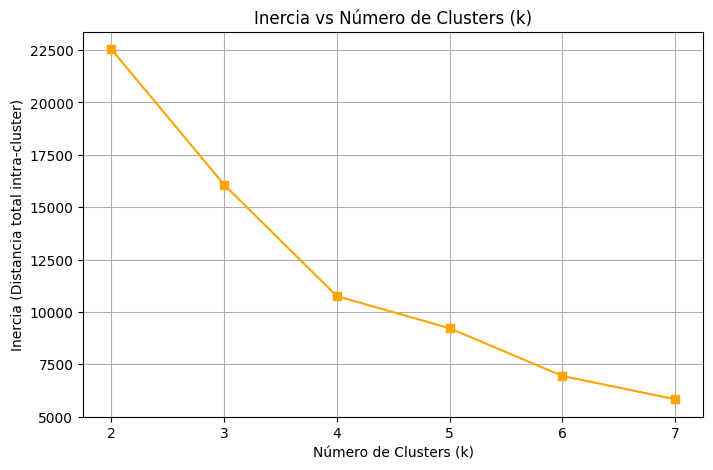

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 10752
Silhouette Score para el número óptimo de clústeres (k=4): 0.40
Test case 1 → asignado al clúster: 3
Test case 2 → asignado al clúster: 3
Test case 3 → asignado al clúster: 2


In [104]:
kmeans_clustering(X_pcas['v2'],2)

## v3

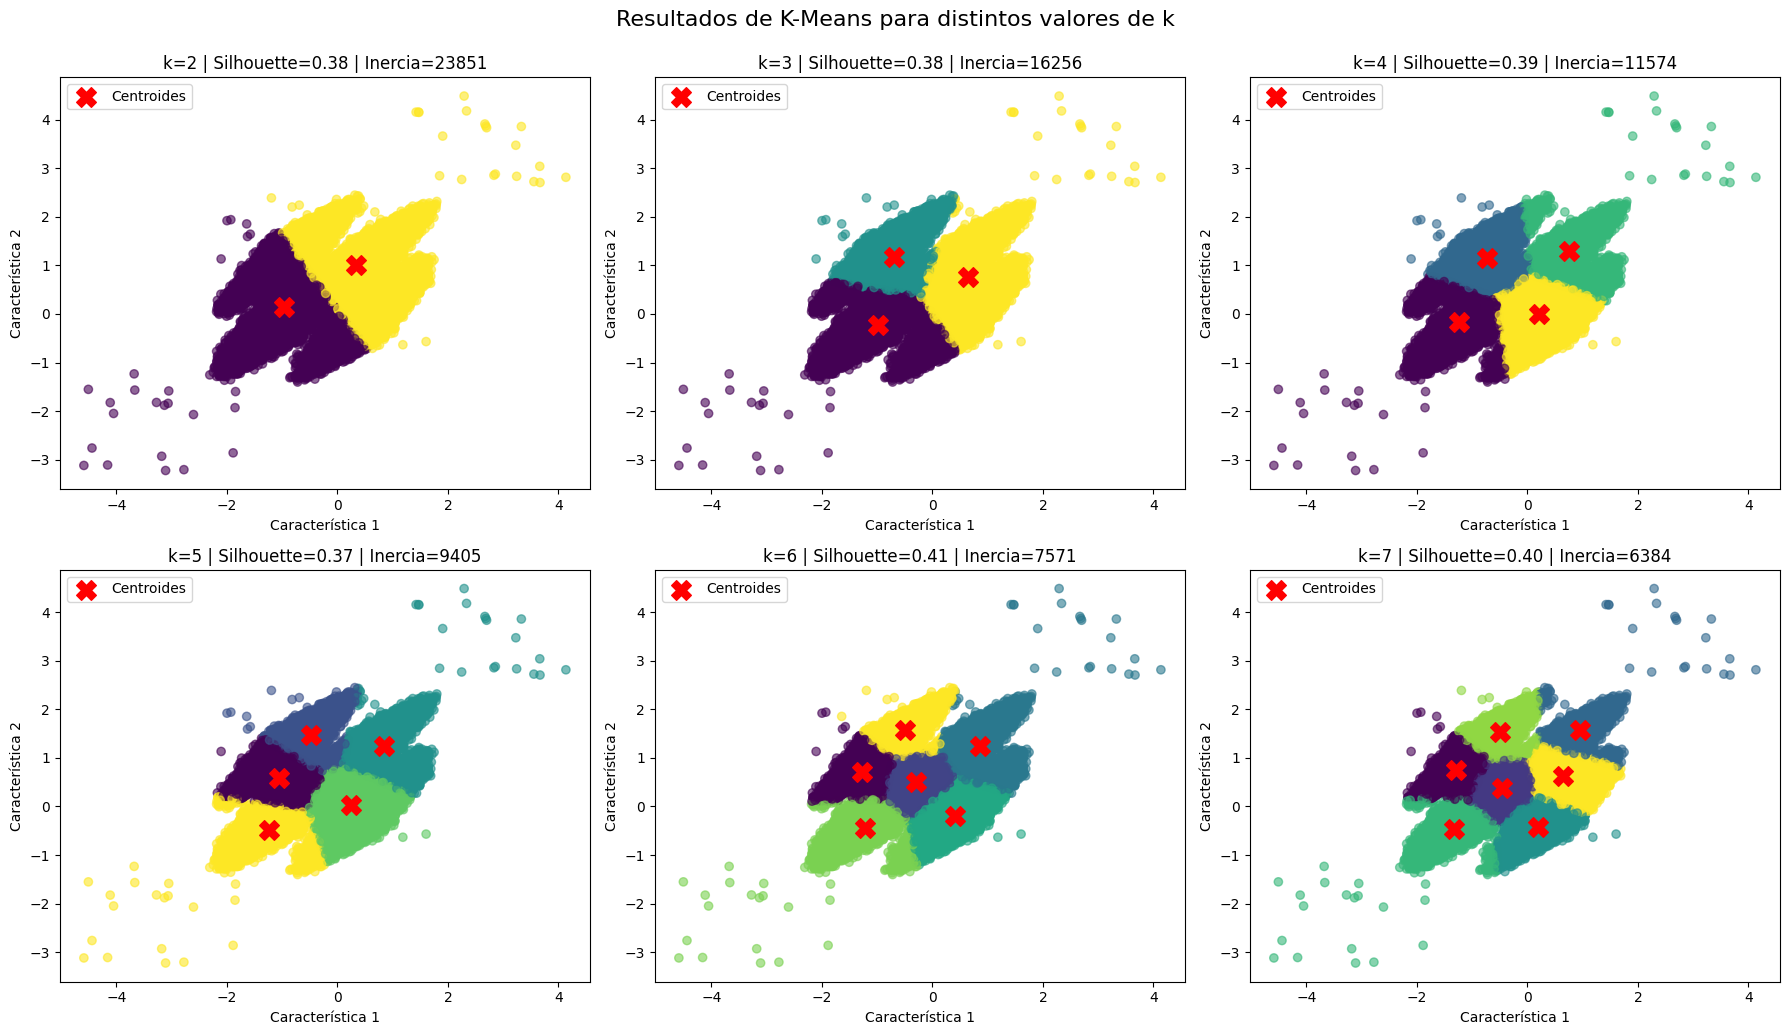

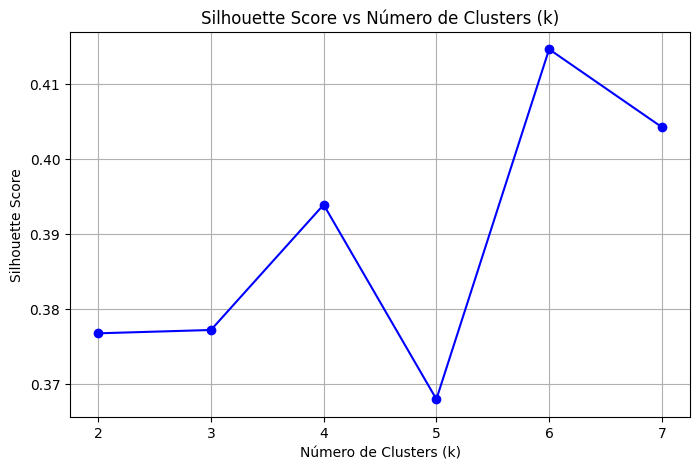

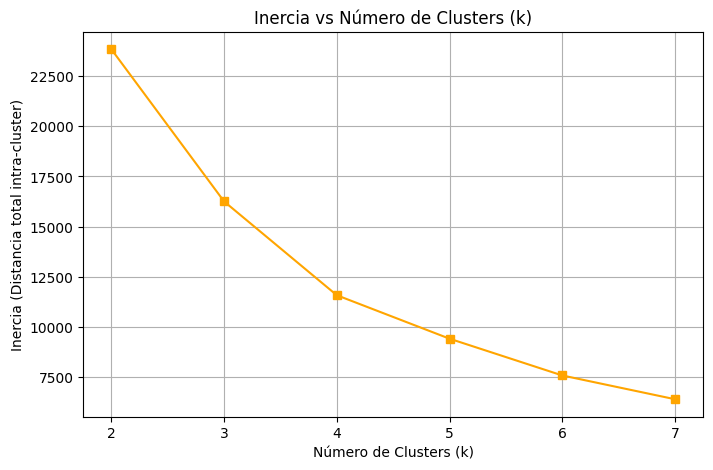

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11574
Silhouette Score para el número óptimo de clústeres (k=4): 0.39
Test case 1 → asignado al clúster: 0
Test case 2 → asignado al clúster: 0
Test case 3 → asignado al clúster: 3


In [105]:
kmeans_clustering(X_pcas['v3'],3)

## v4

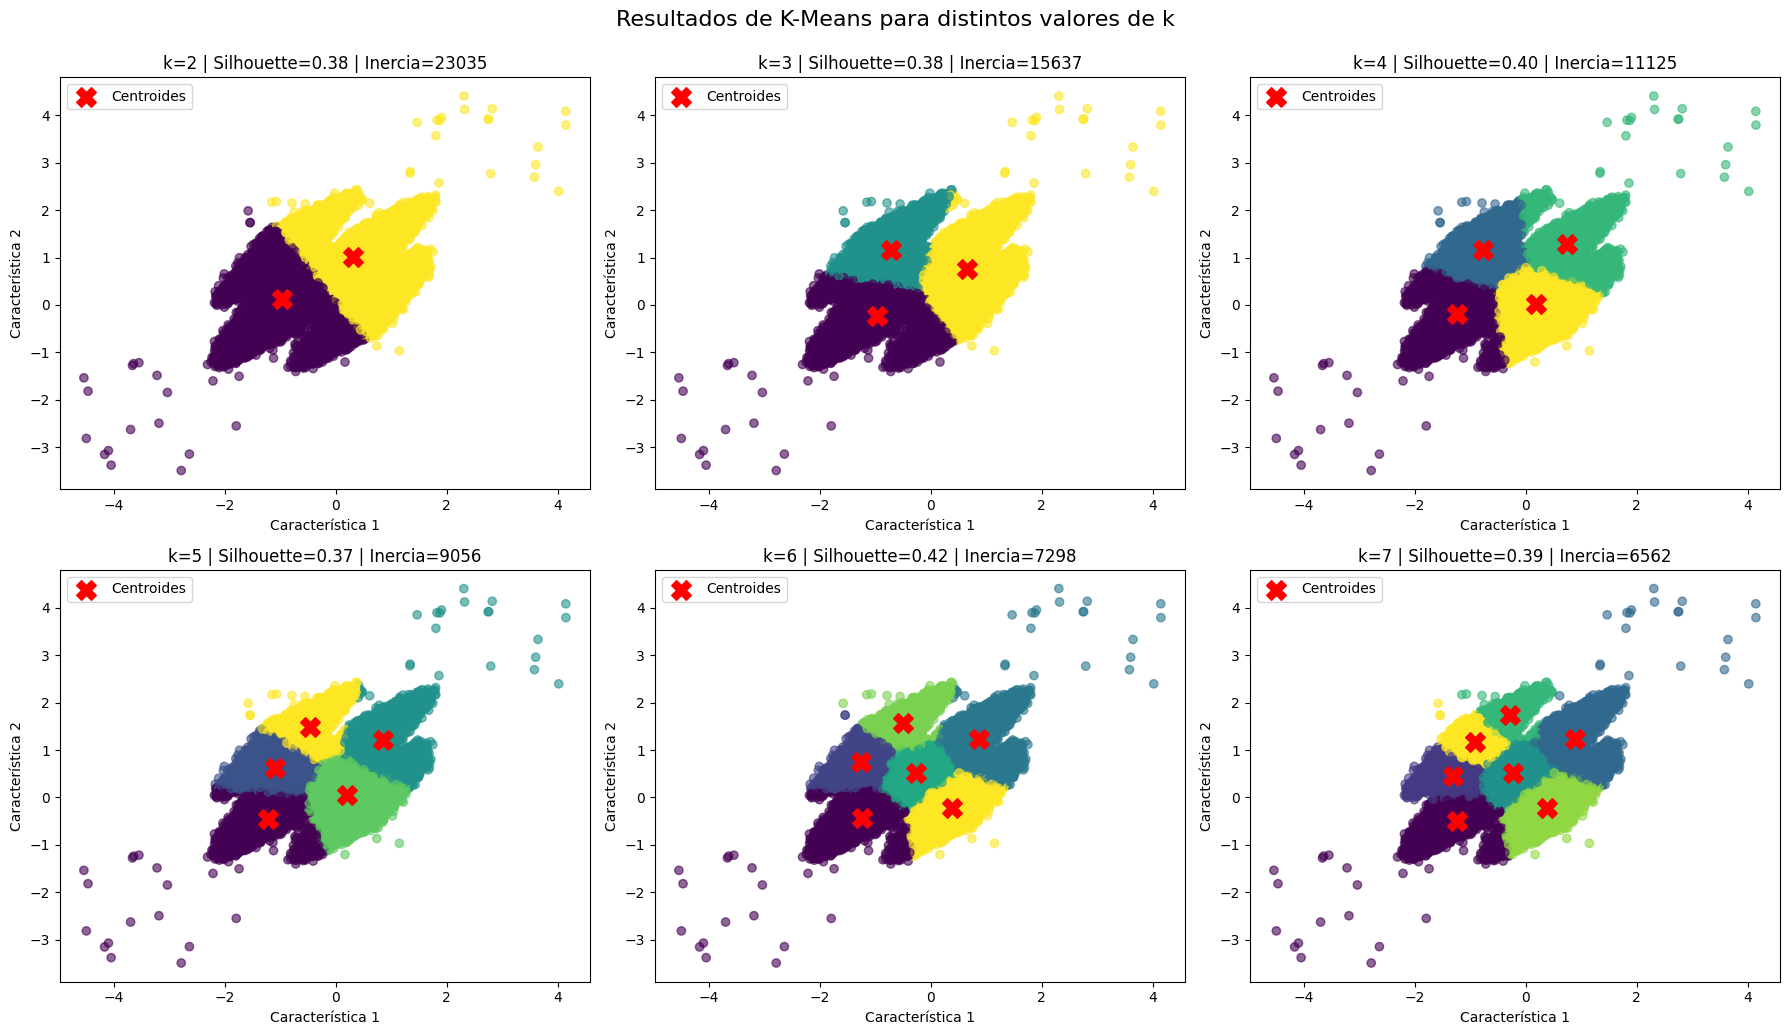

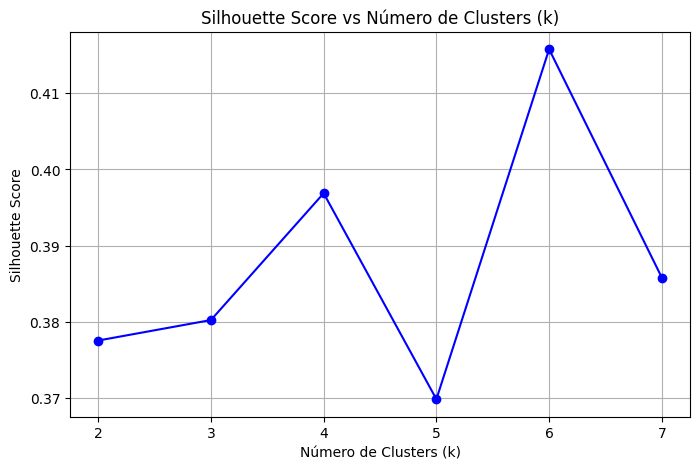

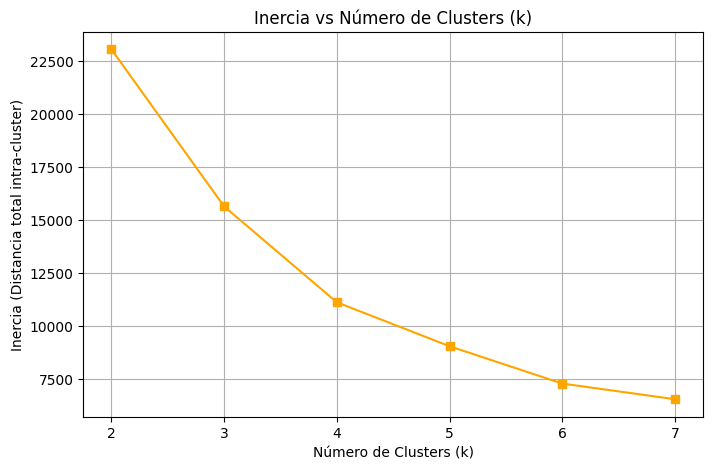

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 11125
Silhouette Score para el número óptimo de clústeres (k=4): 0.40
Test case 1 → asignado al clúster: 0
Test case 2 → asignado al clúster: 0
Test case 3 → asignado al clúster: 3


In [106]:
kmeans_clustering(X_pcas['v4'],4)

## v5

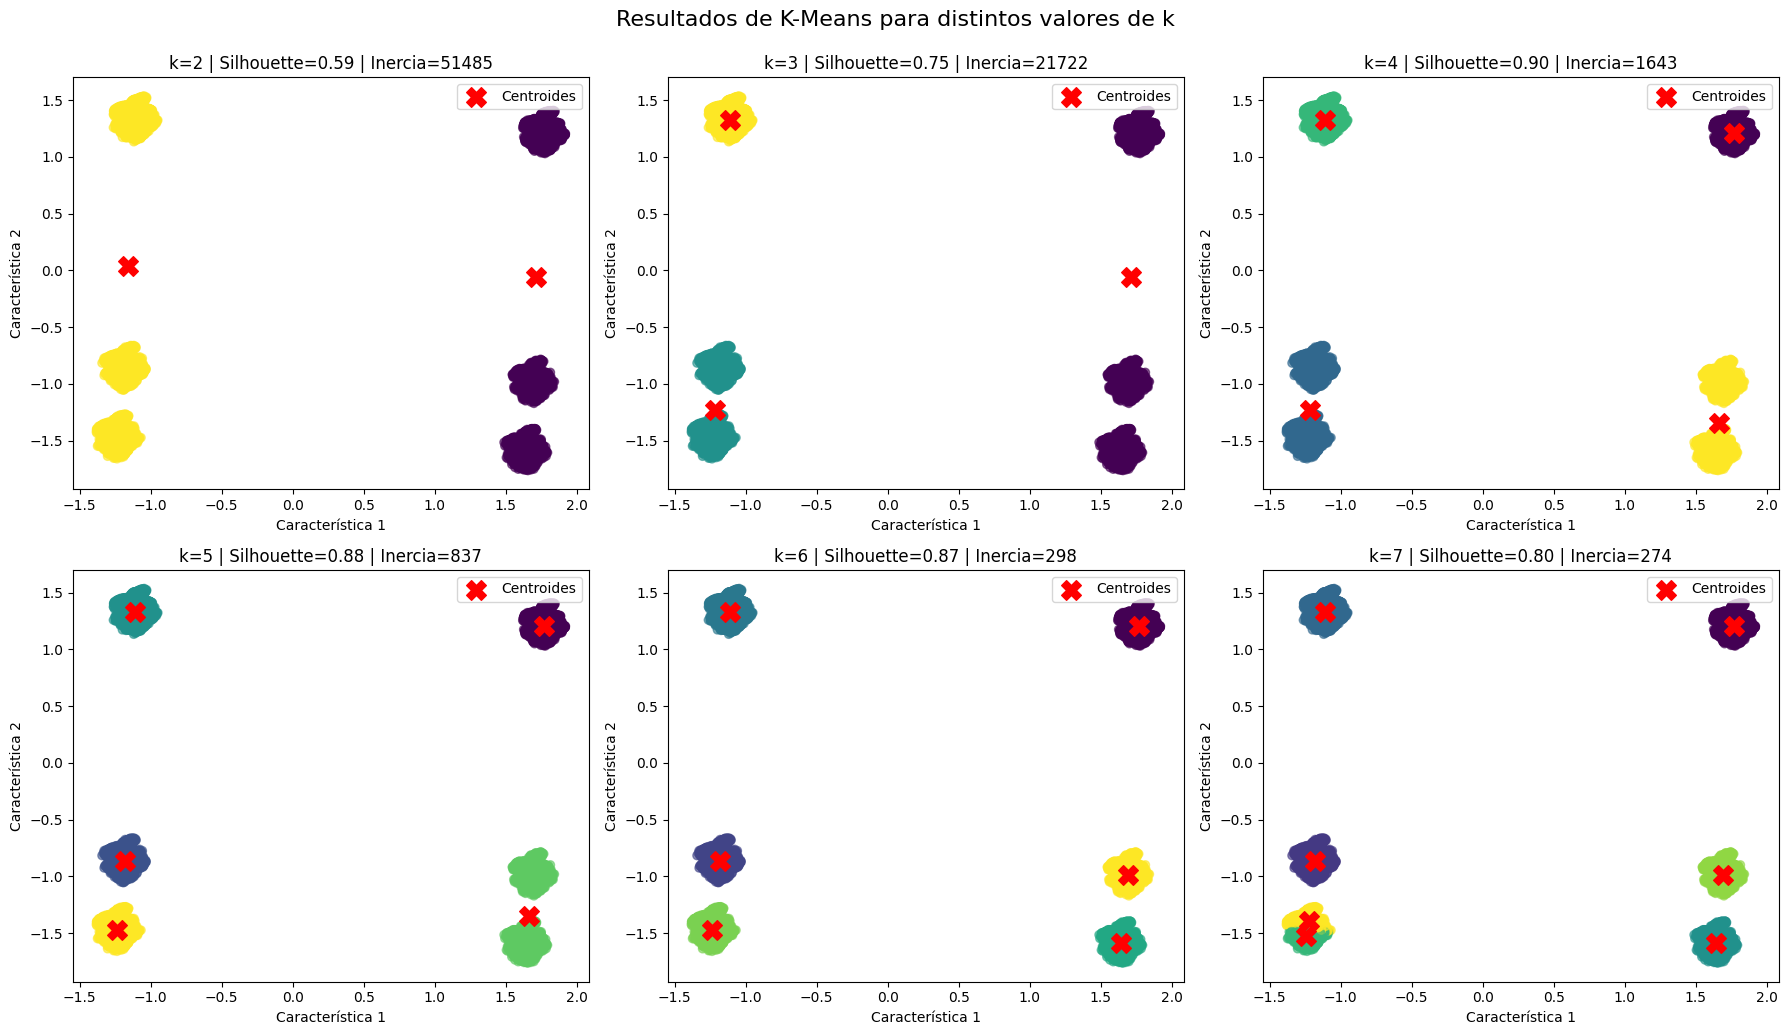

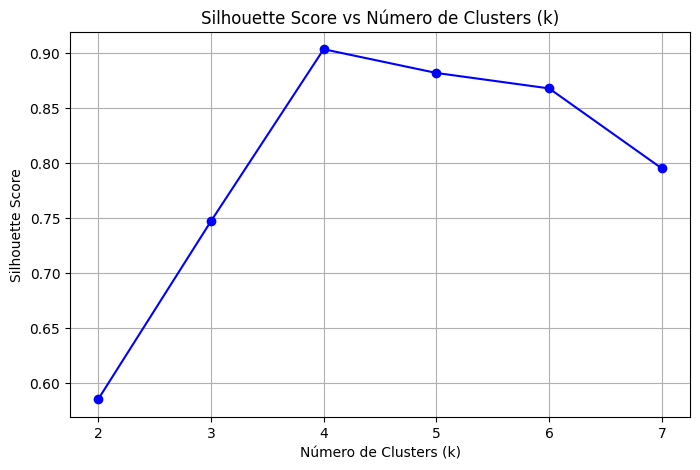

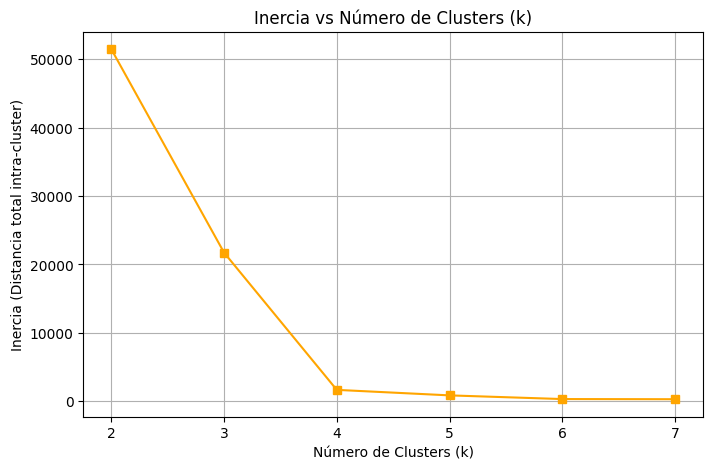

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1643
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 1
Test case 2 → asignado al clúster: 1
Test case 3 → asignado al clúster: 2


In [107]:
kmeans_clustering(X_pcas['v5'],5)

## v6

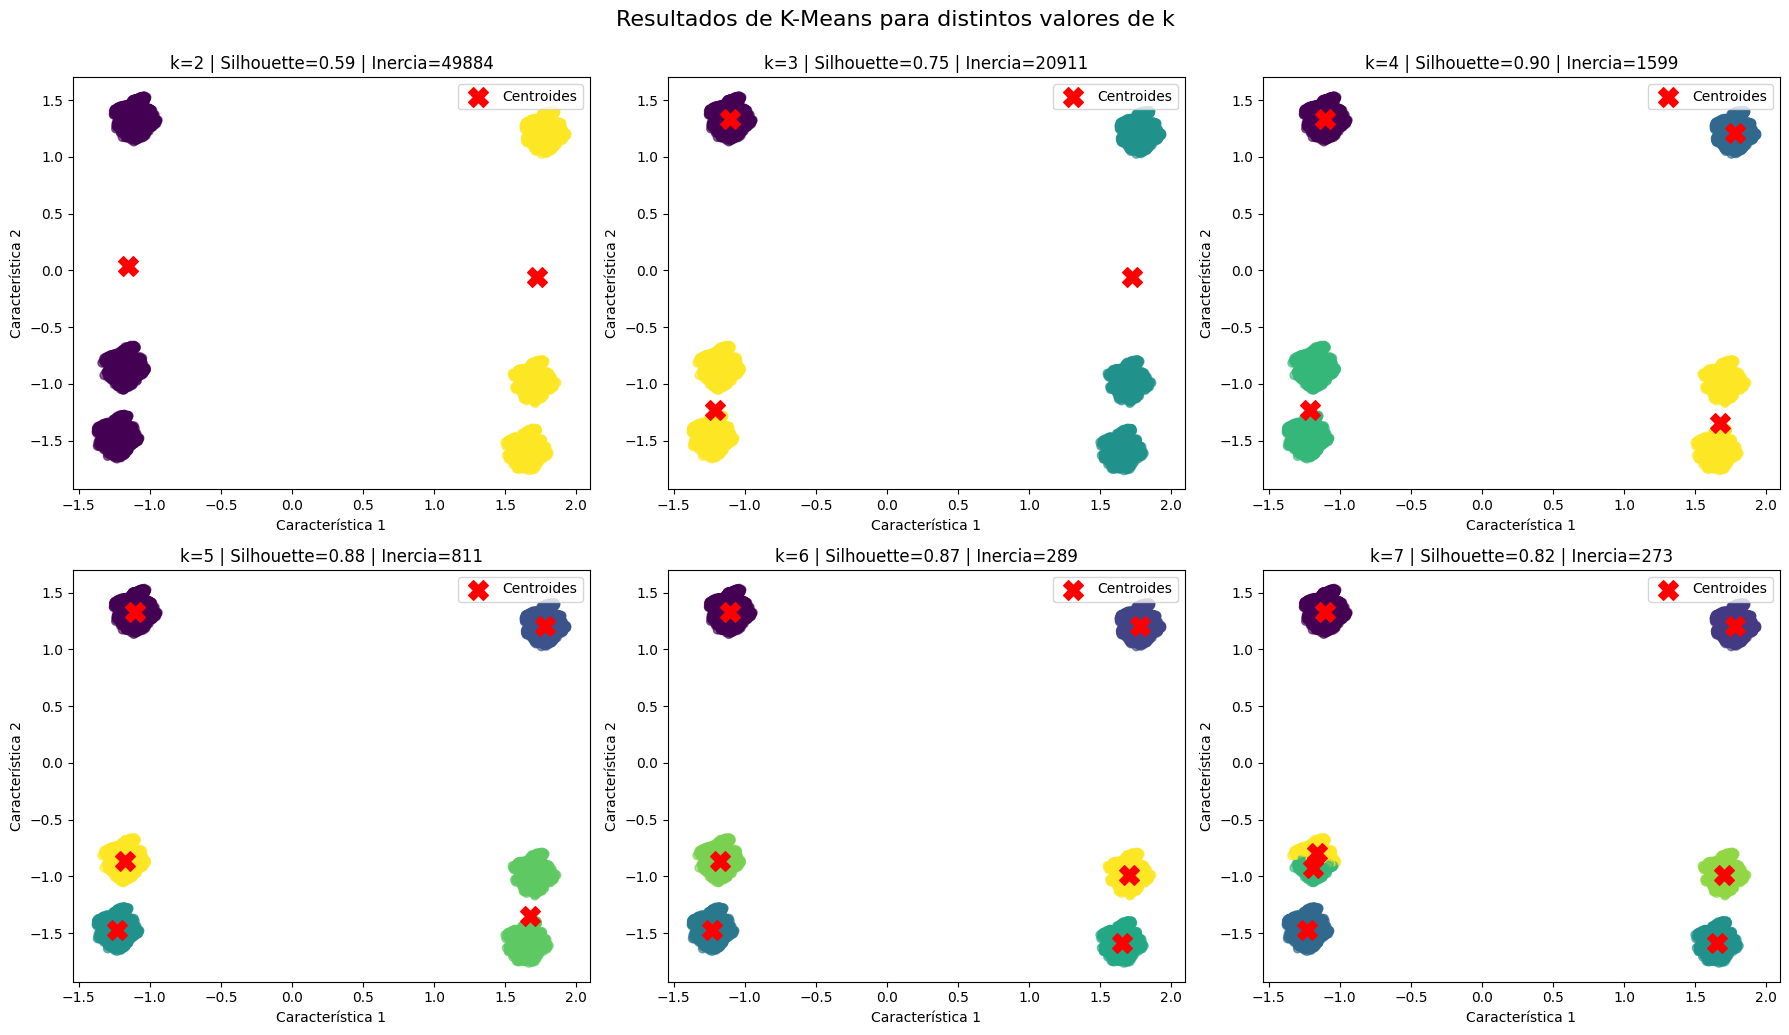

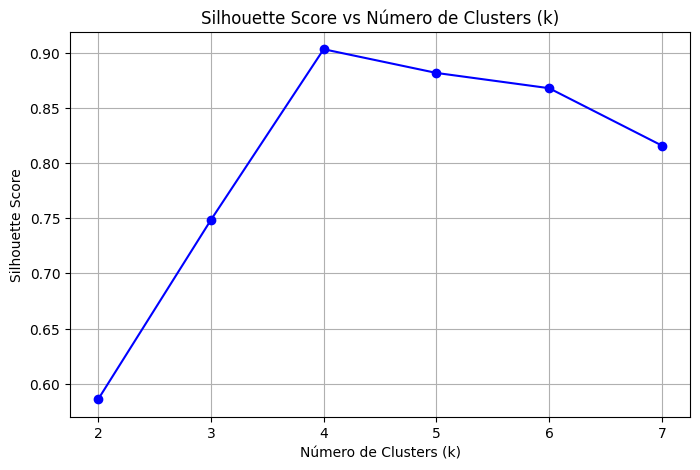

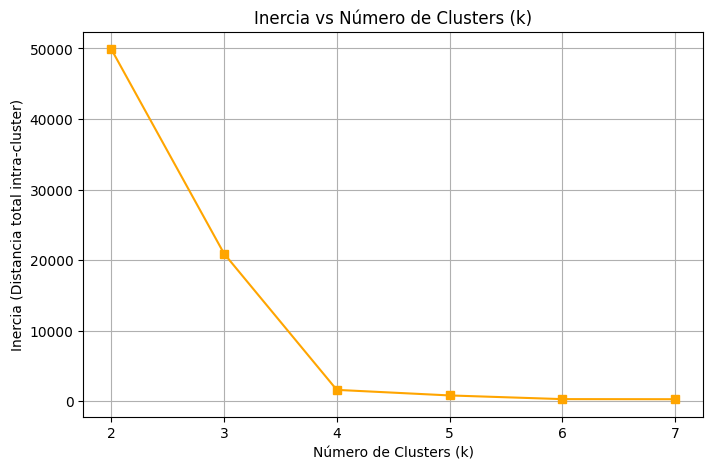

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1599
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [108]:
kmeans_clustering(X_pcas['v6'],6)

## v7

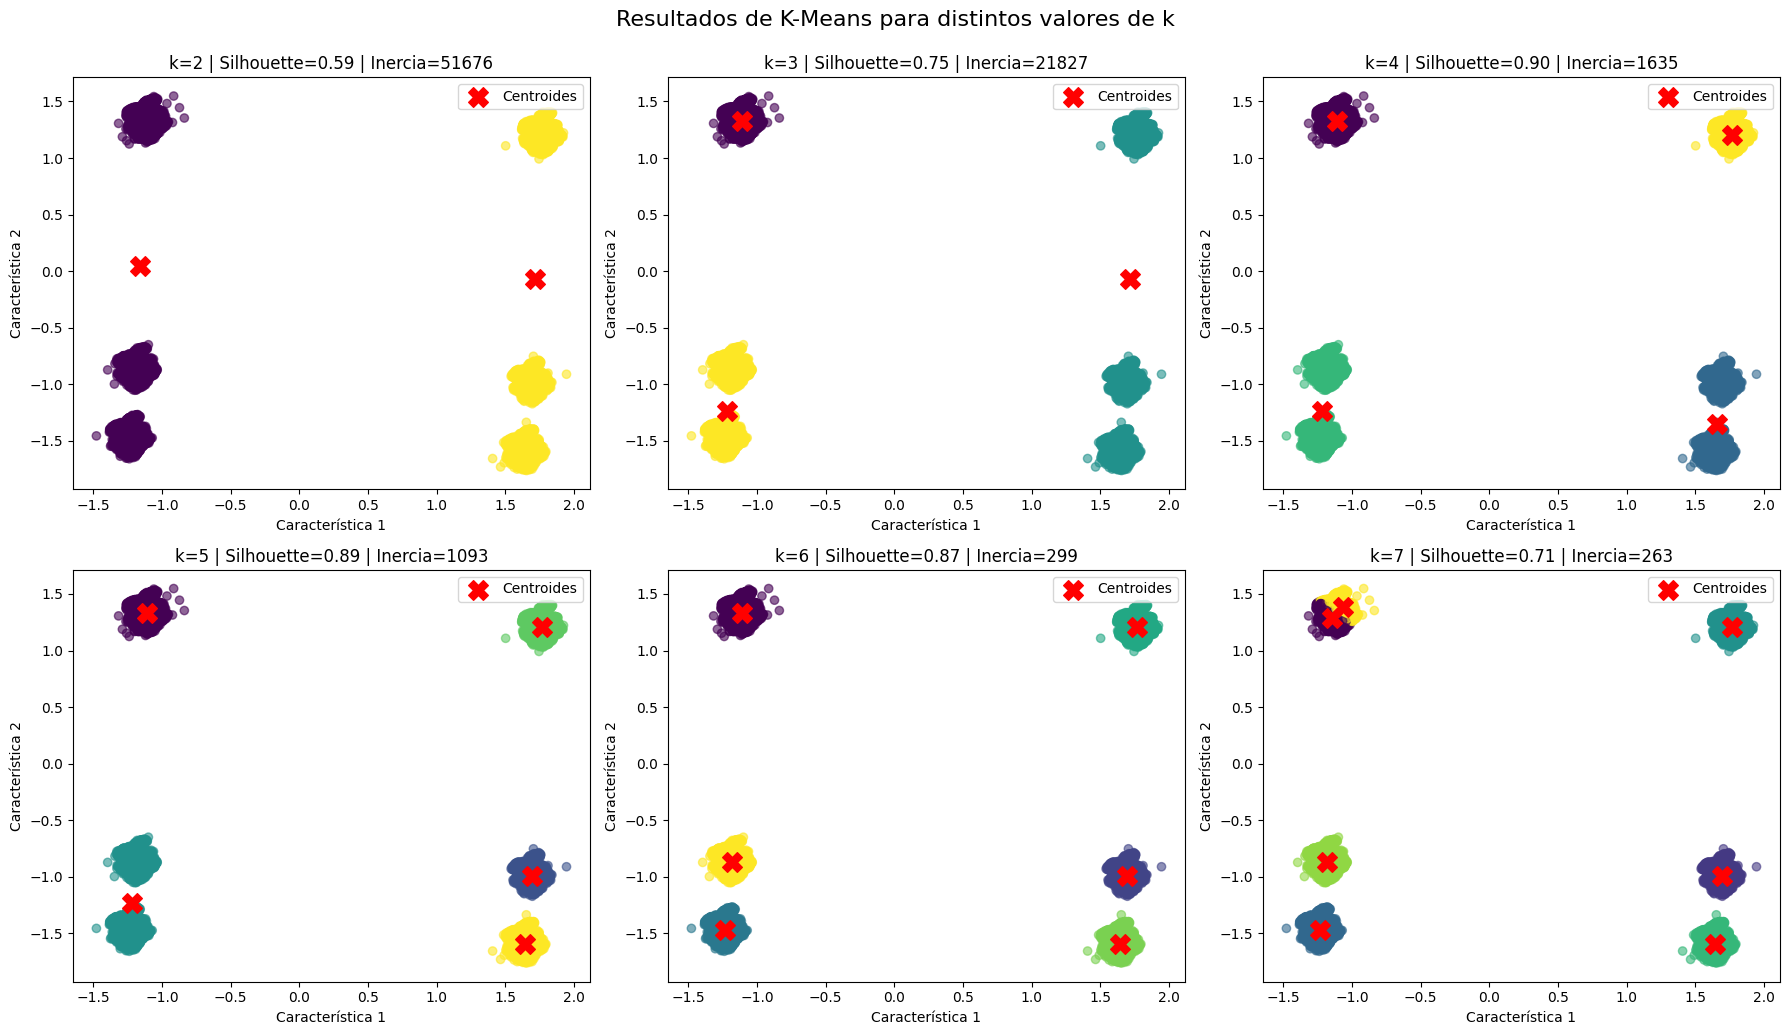

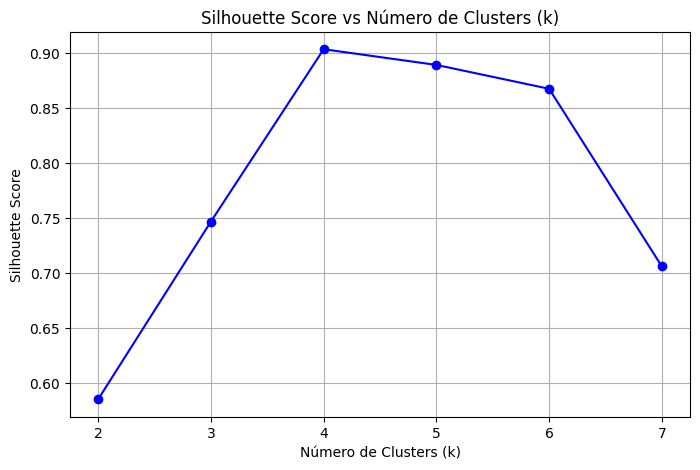

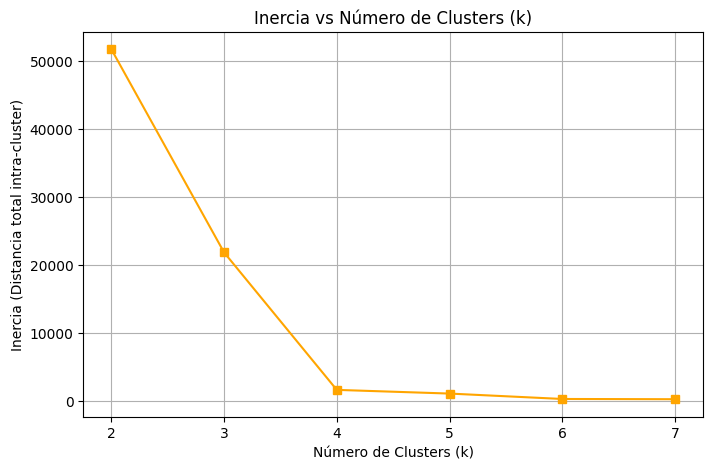

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1635
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [109]:
kmeans_clustering(X_pcas['v7'],7)

## v8

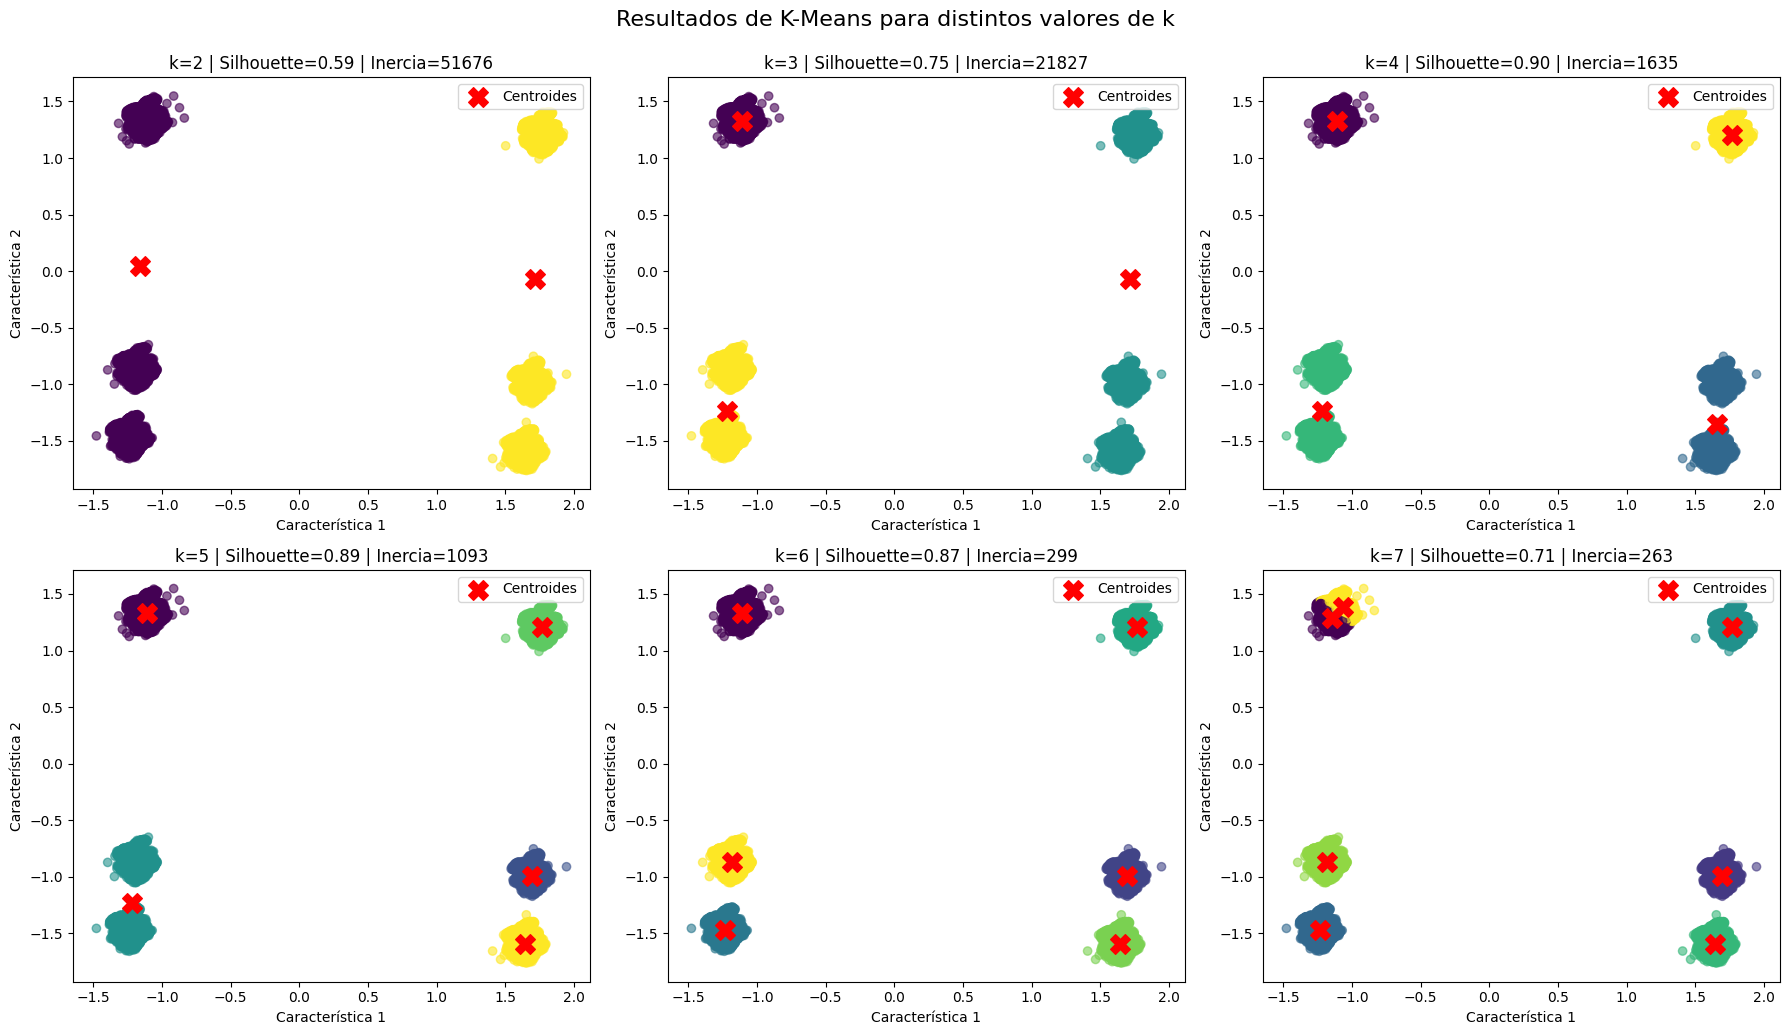

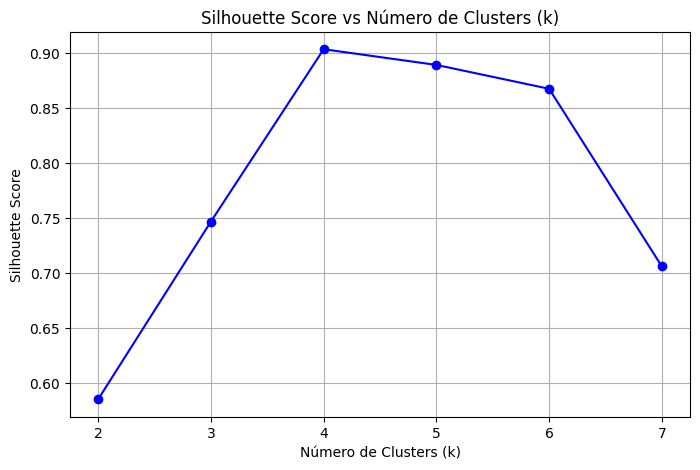

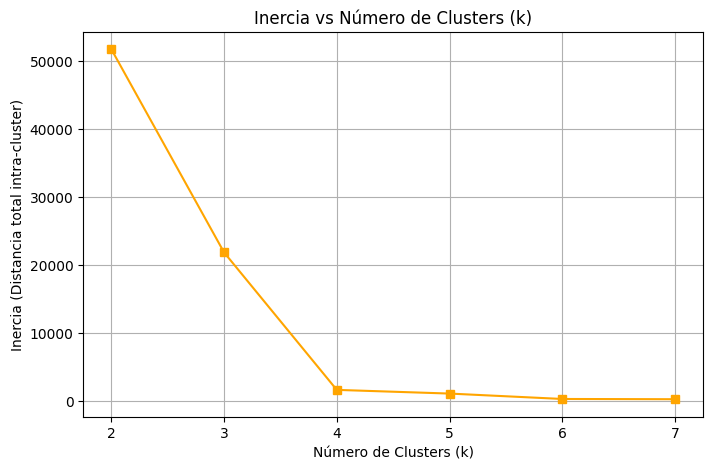

Número óptimo de clústeres según la técnica del codo: 4
Inercia para el número óptimo de clústeres (k=4): 1635
Silhouette Score para el número óptimo de clústeres (k=4): 0.90
Test case 1 → asignado al clúster: 2
Test case 2 → asignado al clúster: 2
Test case 3 → asignado al clúster: 0


In [110]:
kmeans_clustering(X_pcas['v8'],8)

In [112]:
for i in range(1, 9):
    print(f"Dataset v{i} - Mejor número de clusters: {best_k_values[i]}, Inercia: {best_inertias[i]}, Silhouette Score: {best_silhouette_scores[i]:.2f}")

Dataset v1 - Mejor número de clusters: 4, Inercia: 11161.289372897938, Silhouette Score: 0.39
Dataset v2 - Mejor número de clusters: 4, Inercia: 10751.52587155369, Silhouette Score: 0.40
Dataset v3 - Mejor número de clusters: 4, Inercia: 11574.242457700535, Silhouette Score: 0.39
Dataset v4 - Mejor número de clusters: 4, Inercia: 11124.967103220602, Silhouette Score: 0.40
Dataset v5 - Mejor número de clusters: 4, Inercia: 1642.5974593641818, Silhouette Score: 0.90
Dataset v6 - Mejor número de clusters: 4, Inercia: 1598.8930310064536, Silhouette Score: 0.90
Dataset v7 - Mejor número de clusters: 4, Inercia: 1635.3906481424463, Silhouette Score: 0.90
Dataset v8 - Mejor número de clusters: 4, Inercia: 1635.3906481424458, Silhouette Score: 0.90


# DBScan

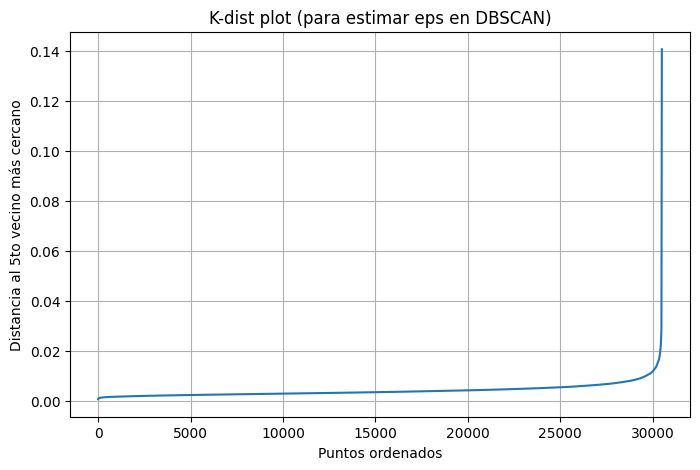

In [120]:
neighbors = NearestNeighbors(n_neighbors=6)
neighbors_fit = neighbors.fit(X_pcas['v8'])  # Usamos el dataset v8 para encontrar las distancias de los vecinos más cercanos
distances, indices = neighbors_fit.kneighbors(X_pcas['v8'])
distances = np.sort(distances[:, 5])  # Tomamos la 5ta distancia más cercana

plt.figure(figsize=(8, 5))
plt.plot(distances)
plt.title('K-dist plot (para estimar eps en DBSCAN)')
plt.xlabel('Puntos ordenados')
plt.ylabel('Distancia al 5to vecino más cercano')
plt.grid(True)
plt.show()

In [ ]:
def plot_k_distance(X, k=4):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    
    # Ordenar las distancias al k-ésimo vecino
    k_distances = np.sort(distances[:, k-1])
    
    # Graficar
    plt.figure(figsize=(8, 4))
    plt.plot(k_distances)
    plt.ylabel(f"Distancia al {k}-ésimo vecino")
    plt.xlabel("Puntos ordenados")
    plt.title("K-Distance Plot para encontrar eps (Ɛ)")
    plt.grid(True)
    plt.show()